<a href="https://colab.research.google.com/github/GentaKanno/irohacho/blob/main/%E3%81%84%E3%82%8D%E3%81%AF%E5%B8%96%E6%AD%A3%E8%A6%8F%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

391 1627 628 1477
縦横比（h/w）: 0.687
1236 849


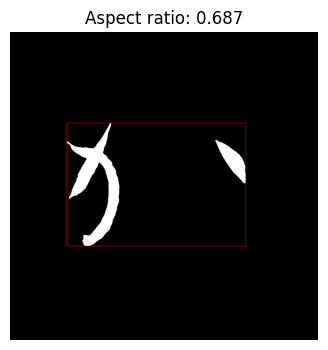

True

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# === パラメータ設定 ===
out_size = 256  # 出力画像の一辺
margin = 20     # 余白（四方）

# === 画像読み込み（グレースケール）===
img = cv.imread("ka-hira.png", cv.IMREAD_GRAYSCALE)

#カーネルサイズ
ksize=15
# 中央値フィルタ
img_mask = cv.medianBlur(img,ksize)

# --- 黒い部分を前景（白）にするため反転 ---
bin_img = cv.bitwise_not(img_mask)

# --- 完全な二値化（念のため） ---
_, bin_img = cv.threshold(bin_img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# --- 輪郭抽出（黒画素を対象に） ---
contours, _ = cv.findContours(bin_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# --- 外接矩形の統合 ---
if len(contours) == 0:
    print("黒画素が見つかりません。")
else:
    x_min = min([cv.boundingRect(c)[0] for c in contours])
    y_min = min([cv.boundingRect(c)[1] for c in contours])
    x_max = max([cv.boundingRect(c)[0] + cv.boundingRect(c)[2] for c in contours])
    y_max = max([cv.boundingRect(c)[1] + cv.boundingRect(c)[3] for c in contours])

    w, h = x_max - x_min, y_max - y_min
    aspect_ratio = h / w if w > 0 else 0

    print(x_min, x_max, y_min, y_max)
    print(f"縦横比（h/w）: {aspect_ratio:.3f}")
    print(w,h)

color_img = cv.cvtColor(bin_img, cv.COLOR_GRAY2BGR)
cv.rectangle(color_img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

# --- Colab上で表示 ---
plt.figure(figsize=(4,4))
plt.imshow(cv.cvtColor(color_img, cv.COLOR_BGR2RGB))
plt.title(f"Aspect ratio: {aspect_ratio:.3f}")
plt.axis("off")
plt.show()

cv.imwrite("blackwhite.png", bin_img)

In [15]:
#外接矩形で切り出し
from PIL import Image

im = Image.open("blackwhite.png")

im_crop = im.crop((x_min, y_min, x_max, y_max))
im_crop.save("kiridashi.png", quality=95)

In [16]:
, img4)# スケーリング係数（長辺を out_size - 2*margin に収める）
scale = (out_size - 2*margin) / max(w, h)

# 出力キャンバス
img2 = np.ones((out_size, out_size, 3), dtype=np.uint8) * 255

# 画像を読み込み
img3 = cv.imread("kiridashi.png")

# 画像のスケールを調整
img4 = cv.resize(img3, None, fx=scale, fy=scale)

# --- 黒い部分を前景（白）にするため反転 ---
img5 = cv.bitwise_not(img4)

cv.imwrite("resize.png",img5)

True

In [17]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

im2 = Image.open("resize.png")

margin_x = int(margin + (out_size - 2*margin - w*scale)/2)
margin_y = int(margin + (out_size - 2*margin - h*scale)/2)

im_final = add_margin(im2, margin_y, margin_x, margin_y, margin_x, (255, 255, 255))
im_final.save("final.png", quality=95)